# Visualizations for iEMSs 2022

This notebook is used to create visualizations, specifically for the conference.

## Imports

In [13]:
from dmdu.general.visualization import plot_conference_pathways, plot_one_pathway
from model.enumerations import ProblemFormulation
import os
import pandas as pd
from ema_workbench import load_results

## Directory

In [2]:
target_directory = os.path.join(
    os.path.dirname(os.getcwd()),
    'data',
    'experiments'
)

## Parameters

In [3]:
problem_formulations = [
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED
]

n_references = 4
n_seeds = 2

problem_formulations_dict = {}

## Load results

In [4]:
for problem_formulation in problem_formulations:

    pf_df = None

    for seed in range(n_seeds):
        for reference in range(n_references):

            # Define path to load data from
            file = f'{problem_formulation.name}_seed_{seed}_reference_{reference}'
            path = os.path.join(target_directory, file)

            # Load results
            _, outcomes = load_results(path)
            outcomes = pd.DataFrame(outcomes)

            # Append results
            pf_df = outcomes if pf_df is None else pd.concat([pf_df, outcomes])

    problem_formulations_dict[problem_formulation.name] = pf_df

In [11]:
experiments_dict = {}
outcomes_dict = {}

for problem_formulation in problem_formulations:

    outcomes_df = None
    experiments_df = None

    for seed in range(n_seeds):
        for reference in range(n_references):

            # Define path to load data from
            file = f'{problem_formulation.name}_seed_{seed}_reference_{reference}'
            path = os.path.join(target_directory, file)

            # Load results
            experiments, outcomes = load_results(path)
            outcomes = pd.DataFrame(outcomes)

            # Append results
            outcomes_df = outcomes if outcomes_df is None else pd.concat([outcomes_df, outcomes])
            experiments_df = experiments if experiments_df is None else pd.concat([experiments_df, experiments])

    outcomes_dict[problem_formulation.name] = outcomes_df
    experiments_dict[problem_formulation.name] = experiments_df


UTILITARIAN_DISAGGREGATED


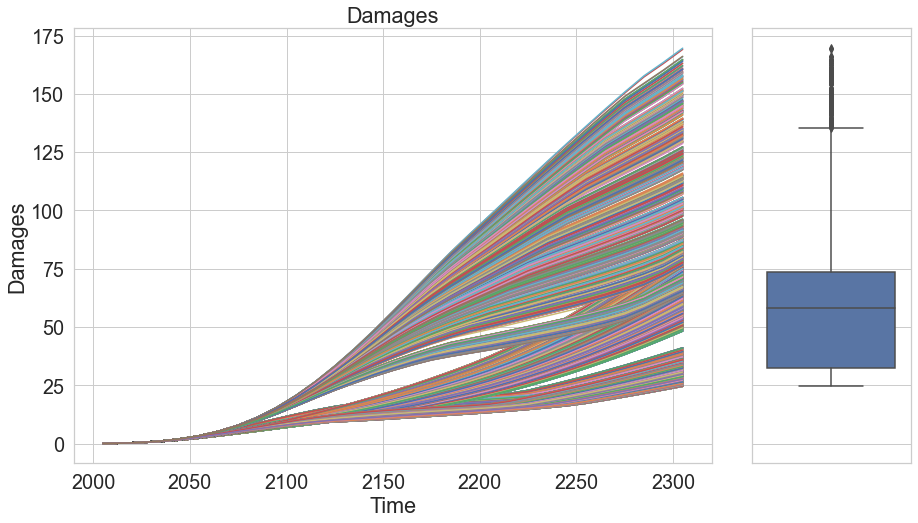

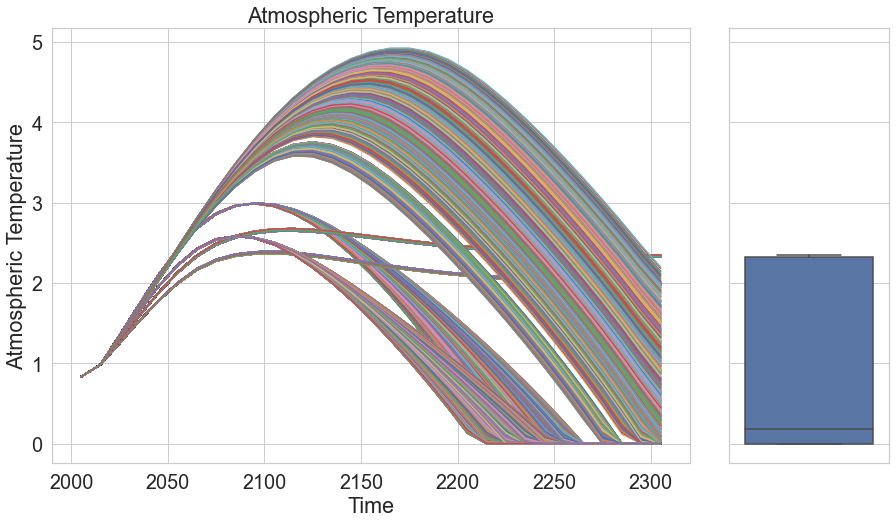

SUFFICIENTARIAN_DISAGGREGATED


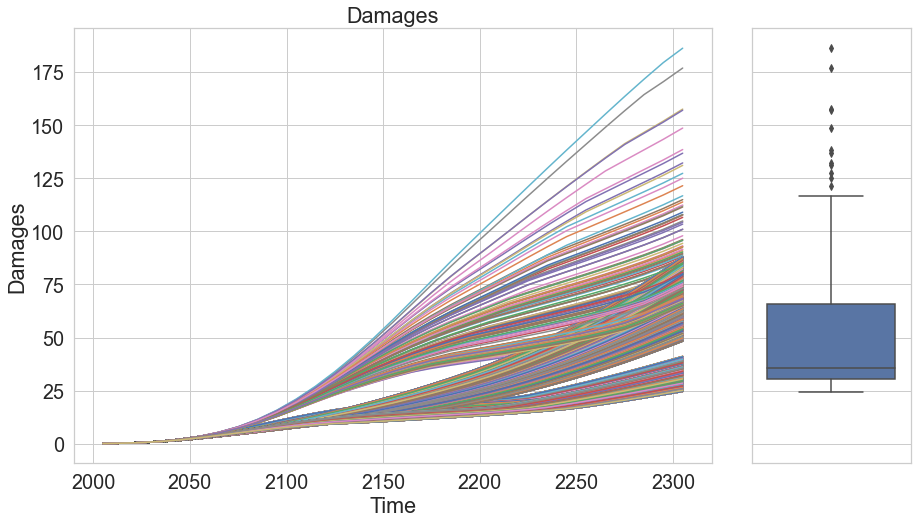

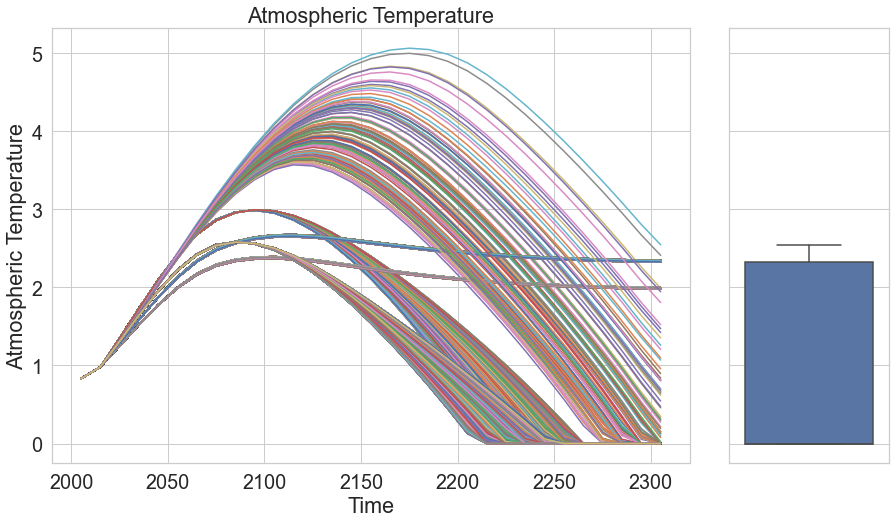

In [19]:
objectives = ['Damages', 'Atmospheric Temperature']

for pf in problem_formulations:
    print(pf.name)
    for objective in objectives:
        plot_one_pathway(
            experiments=experiments_dict[pf.name],
            outcomes=outcomes_dict[pf.name],
            outcome_name=objective,
            saving=False,
            file_name=None
        )

## Visualization: damages and atmospheric temperature increase

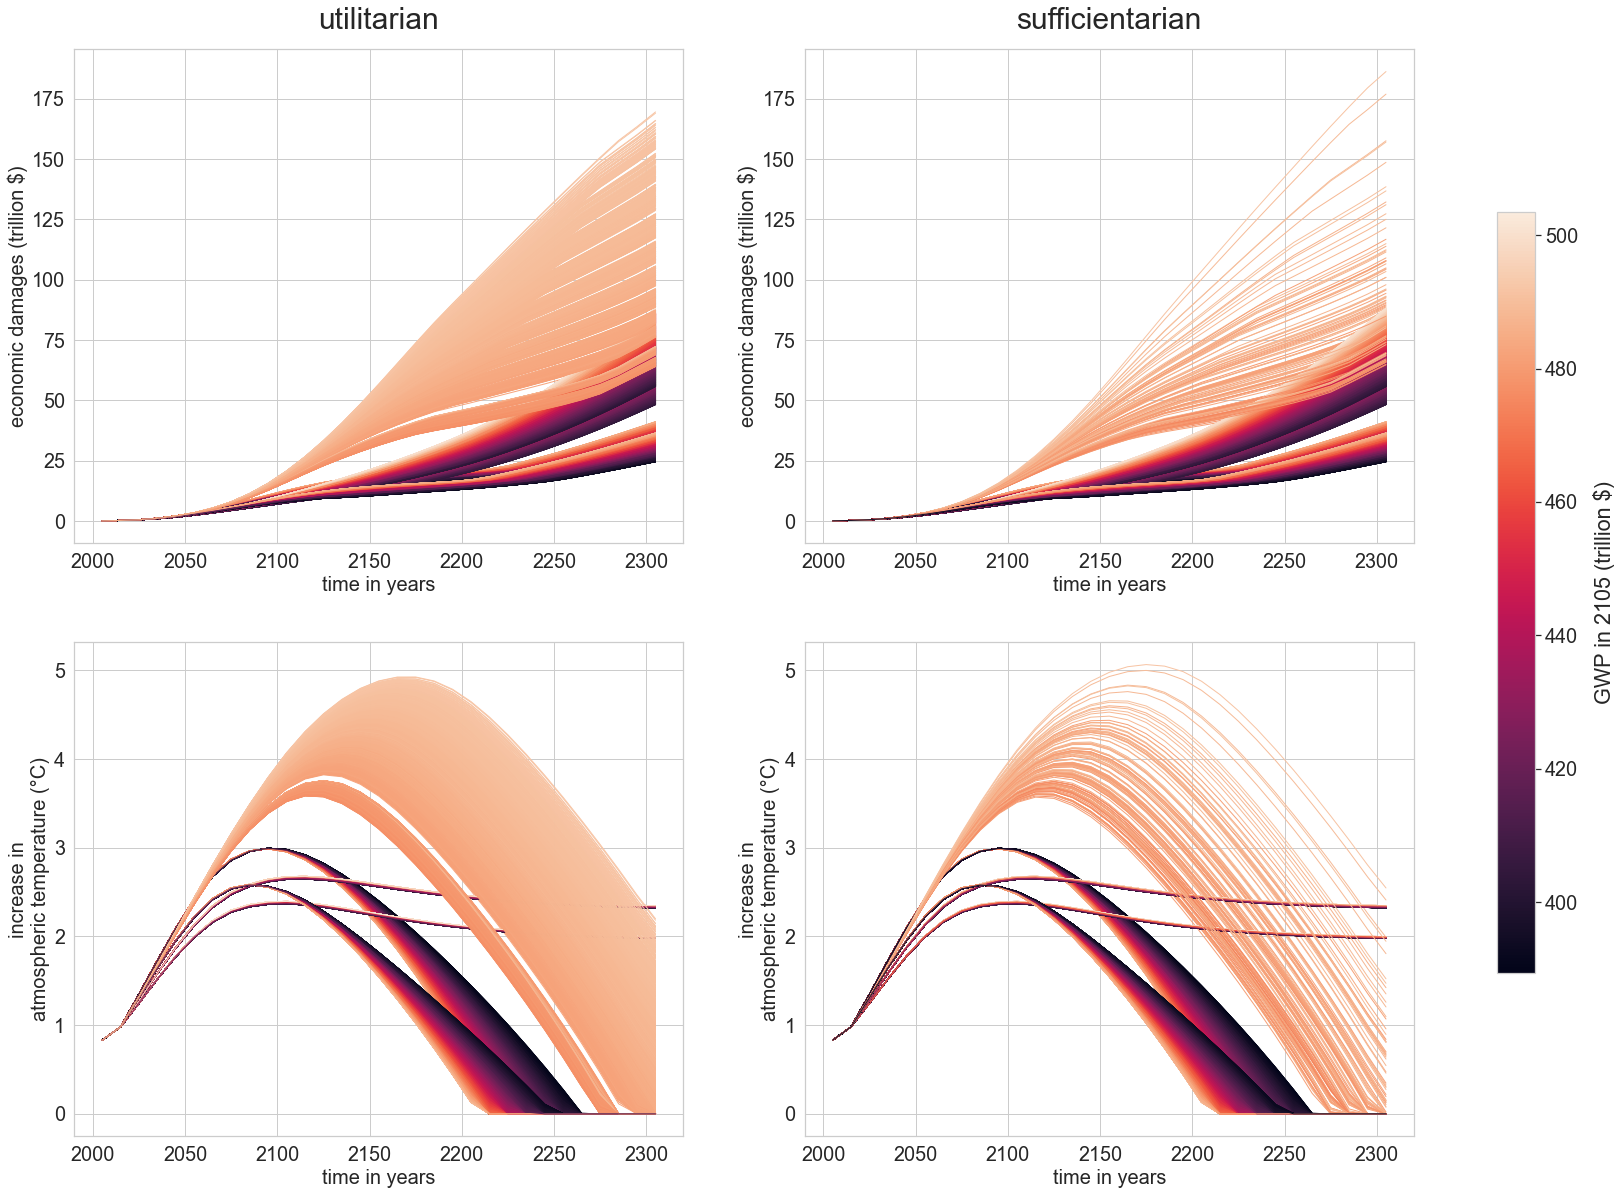

In [10]:
plot_conference_pathways(
    problem_formulations_dict=problem_formulations_dict,
    shaded_outcome_name='Total Output 2105',
    uni_color=False,
    saving=True,
    file_name=f'iEMSs_pathways_with_GWP'
)

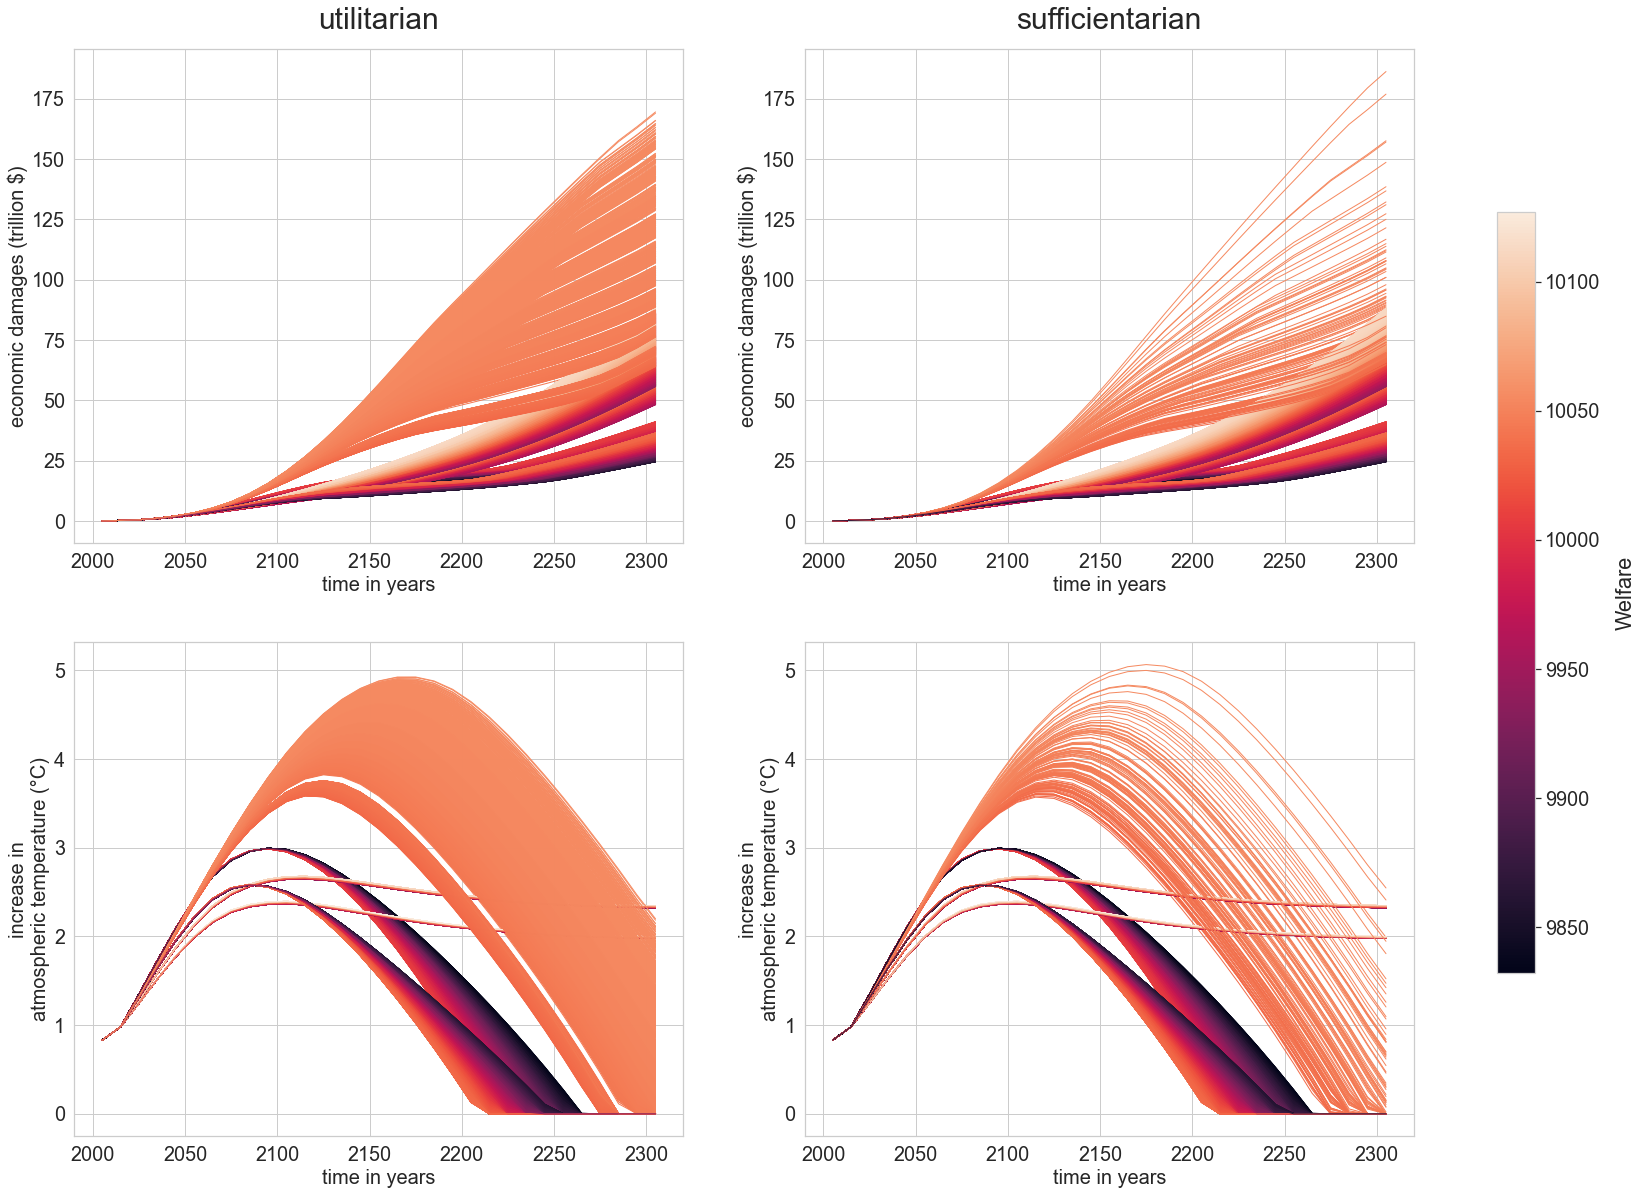

In [9]:
plot_conference_pathways(
        problem_formulations_dict=problem_formulations_dict,
        shaded_outcome_name='Utility 2105',
        saving=True,
        file_name='iEMSs_pathways_with_welfare'
)

## Visualization: welfare and welfare loss (with color: temperature increase)

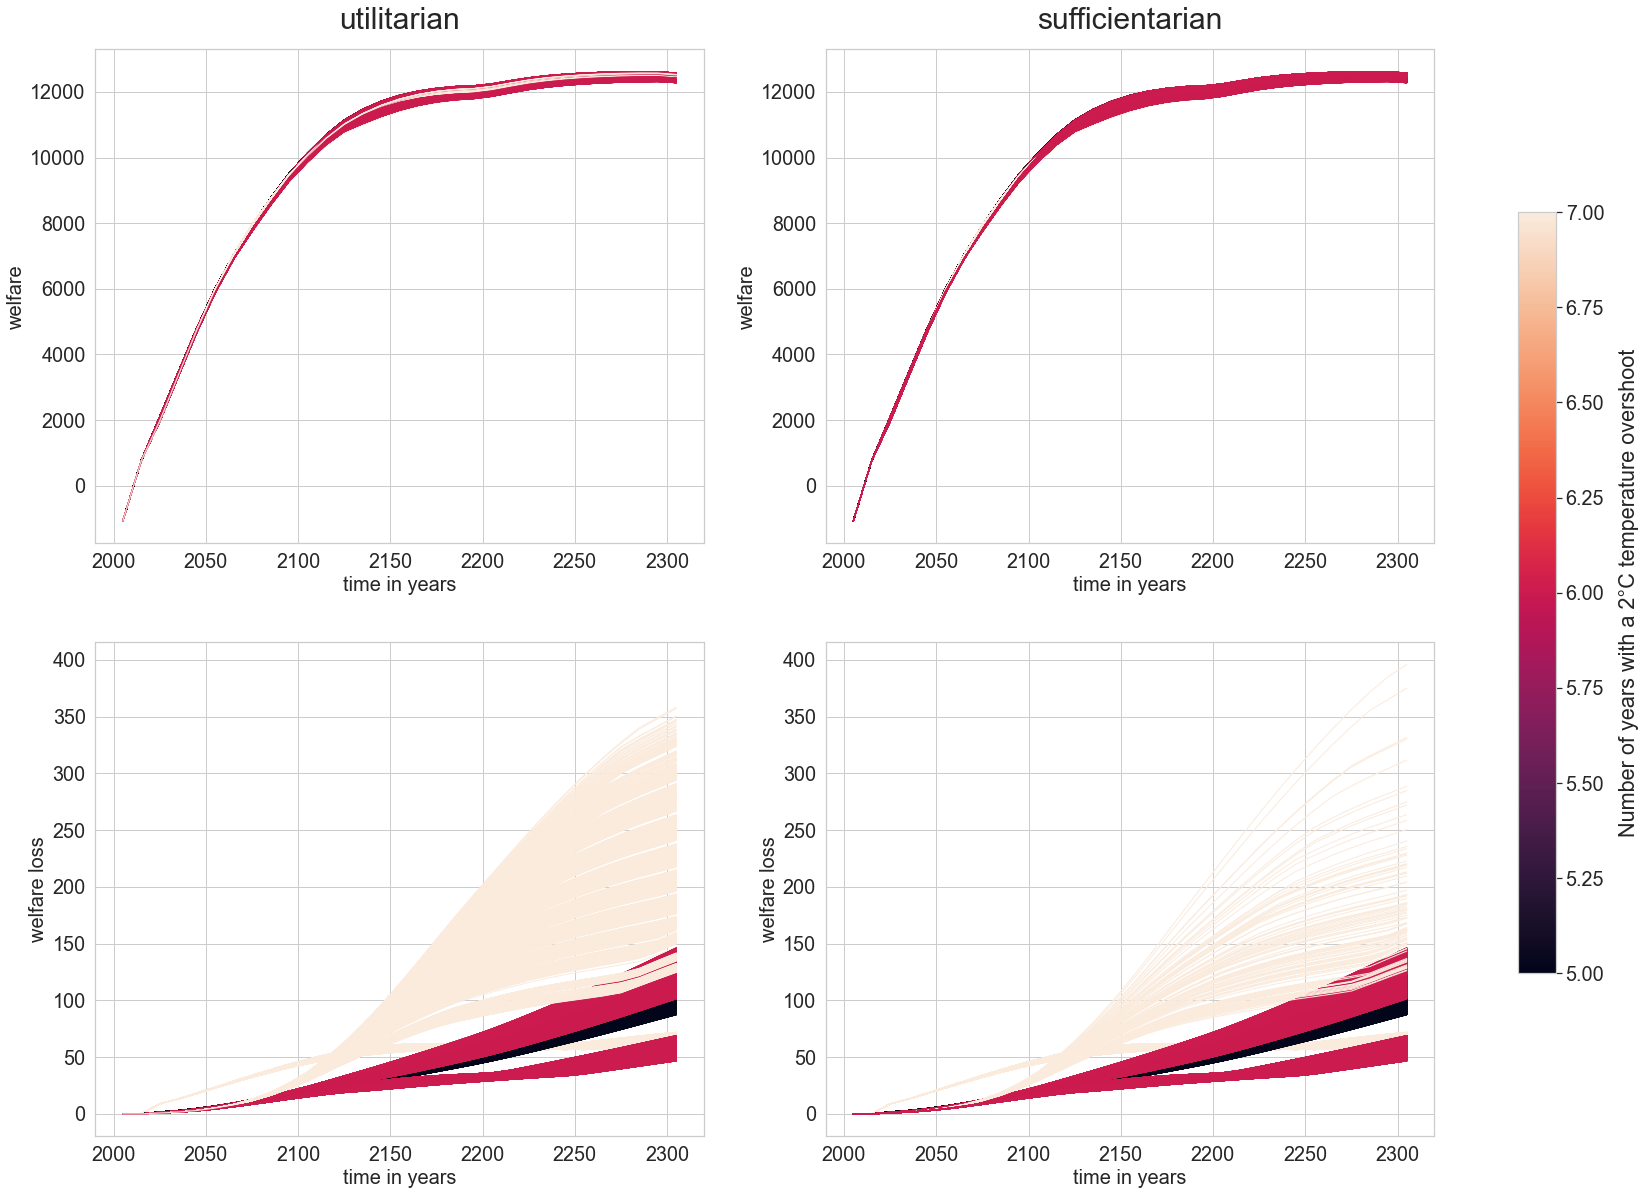

In [7]:
plot_conference_pathways(
    problem_formulations_dict=problem_formulations_dict,
    outcome_names=['Utility', 'Disutility'],
    shaded_outcome_name='Temperature overshoot 2105',
    uni_color=False,
    saving=True,
    file_name=f'iEMSs_pathways_welfare_welfare_loss_temperature'
)